# Logistic Regression for multi-class problem

In [32]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('../../common')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions

In [51]:
import pandas as pd
print(pd.__version__)

0.24.2


## 載入Iris資料集


In [34]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].size)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data

600
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

In [42]:
y_train

60     1
116    2
144    2
119    2
108    2
69     1
135    2
56     1
80     1
123    2
133    2
106    2
146    2
50     1
147    2
85     1
30     0
101    2
94     1
64     1
89     1
91     1
125    2
48     0
13     0
111    2
95     1
20     0
15     0
52     1
      ..
14     0
122    2
19     0
29     0
130    2
49     0
136    2
99     1
82     1
79     1
115    2
145    2
72     1
77     1
25     0
81     1
140    2
142    2
39     0
58     1
88     1
70     1
87     1
36     0
21     0
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 105, dtype: int32

In [36]:
type(y_test)

pandas.core.series.Series

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [40]:
iris_data


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(X_train,y_train)
print('training accuracy:',lr.score(X_train, y_train))
print('test accuracy:',lr.score(X_test, y_test))

training accuracy: 0.9619047619047619
test accuracy: 0.9555555555555556


In [15]:
#prediction
pred=lr.predict(X_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [45]:
len(y_test.values)

45

In [16]:
#ground truth
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [44]:
error_index=np.where(pred!=y_test.values)[0]
error_index

array([24, 37], dtype=int64)

In [46]:
X_test.head()


,sepal length (cm),petal length (cm)
114,5.8,5.1
62,6.0,4.0
33,5.5,1.4
107,7.3,6.3
7,5.0,1.5


In [47]:
iris_data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [18]:
error_index=np.where(pred!=y_test.values)[0]
print('accuracy:',1-len(error_index)/len(X_test))
print('error_index:',error_index)
print('miss classification :',pred[error_index])
data_index=X_test.iloc[error_index].index
iris_data.iloc[data_index]

accuracy: 0.9555555555555556
error_index: [24 37]
miss classification : [1 2]


,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


## decision_regions for test data

In [49]:
iris_data.iloc[data_index]

,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


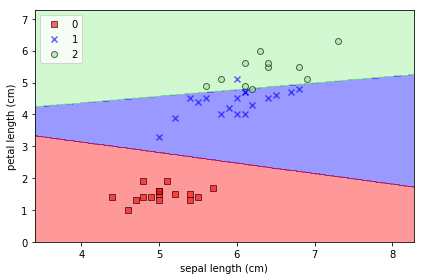

In [52]:
X_test_nd=X_test.values
plot_decision_regions(X_test_nd,y_test, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## decision_regions for training data

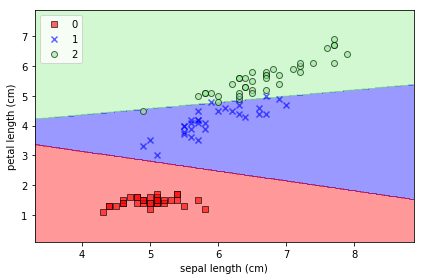

In [53]:
X_train_nd=X_train.values
plot_decision_regions(X_train_nd,y_train, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## getting the confusion matrix

In [54]:
y_test.shape[0]

45

In [58]:
[i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==2]

[37]

In [59]:
[i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==1]

[24]

In [55]:
a=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==0 and pred[i]==0])
b=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==0 and pred[i]==1])
c=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==0 and pred[i]==2])
d=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==0])
e=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==1])
f=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==2])
g=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==0])
h=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==1])
i=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==2])
confusion_matrix=np.array([[a,b,c],[d,e,f],[g,h,i]])
print(confusion_matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
